# New Section

In [ ]:

!mkdir ds_gurukrushna

[Errno 2] No such file or directory: 'ds_gurukrushna'
/content/ds_gurukrushna


In [ ]:
%pwd

'/content/ds_gurukrushna'

In [ ]:
!mkdir csv_files

In [11]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_gurukrushna/csv_files/historical_data.csv")
df_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_gurukrushna/csv_files/fear_greed_index.csv")

In [28]:
df_1.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [30]:
df_1_copy = df_1
df_1_copy["date and time"]=pd.to_datetime(df_1_copy["timestamp"],unit = 's')


In [31]:
type(df_1_copy["date and time"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
str(df_1_copy["date and time"].dt.date[0])

'2018-02-01'

In [33]:
# same time stamp

df_1_copy[df_1_copy["date and time"].dt.date.astype(str) == df_1_copy["date"]]

,timestamp,value,classification,date,date and time
0,1517463000,30,Fear,2018-02-01,2018-02-01 05:30:00
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02 05:30:00
2,1517635800,40,Fear,2018-02-03,2018-02-03 05:30:00
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04 05:30:00
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05 05:30:00
...,...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28,2025-04-28 05:30:00
2640,1745904600,60,Greed,2025-04-29,2025-04-29 05:30:00
2641,1745991000,56,Greed,2025-04-30,2025-04-30 05:30:00
2642,1746077400,53,Neutral,2025-05-01,2025-05-01 05:30:00


In [34]:
df_1_copy["hrs"] = df_1_copy["date and time"].dt.hour
df_1_copy["minute"] = df_1_copy["date and time"].dt.minute
df_1_copy["second"] = df_1_copy["date and time"].dt.second
df_1_copy.drop(columns = ["date and time"], inplace = True)

In [35]:
df_1_copy.head()

,timestamp,value,classification,date,hrs,minute,second
0,1517463000,30,Fear,2018-02-01,5,30,0
1,1517549400,15,Extreme Fear,2018-02-02,5,30,0
2,1517635800,40,Fear,2018-02-03,5,30,0
3,1517722200,24,Extreme Fear,2018-02-04,5,30,0
4,1517808600,11,Extreme Fear,2018-02-05,5,30,0


In [36]:
df_1_copy["second"].unique()

array([0], dtype=int32)

In [37]:
df_1_copy["hrs"].unique()

array([5], dtype=int32)

In [38]:
df_1_copy["minute"].unique()

array([30], dtype=int32)

In [39]:

df_1_copy.classification.unique()
categories = [ ['Extreme Fear', 'Fear','Neutral', 'Greed', 'Extreme Greed']]

In [40]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories =categories )


In [41]:
df_1_copy['classification_encoded'] = encoder.fit_transform(df_1_copy[["classification"]])

In [42]:
df_1_copy.head()

,timestamp,value,classification,date,hrs,minute,second,classification_encoded
0,1517463000,30,Fear,2018-02-01,5,30,0,1.0
1,1517549400,15,Extreme Fear,2018-02-02,5,30,0,0.0
2,1517635800,40,Fear,2018-02-03,5,30,0,1.0
3,1517722200,24,Extreme Fear,2018-02-04,5,30,0,0.0
4,1517808600,11,Extreme Fear,2018-02-05,5,30,0,0.0


In [43]:
df_1_copy["classification_encoded"] = df_1_copy["classification_encoded"] - 2

In [44]:
df_1_copy.head()

,timestamp,value,classification,date,hrs,minute,second,classification_encoded
0,1517463000,30,Fear,2018-02-01,5,30,0,-1.0
1,1517549400,15,Extreme Fear,2018-02-02,5,30,0,-2.0
2,1517635800,40,Fear,2018-02-03,5,30,0,-1.0
3,1517722200,24,Extreme Fear,2018-02-04,5,30,0,-2.0
4,1517808600,11,Extreme Fear,2018-02-05,5,30,0,-2.0


([<matplotlib.patches.Wedge at 0x7dbf008d7320>,
 [Text(0.6593956577165611, 0.8804529326344164, 'Fear'),
  Text(-0.9471354717197129, 0.5594053970156858, 'Extreme Fear'),
  Text(-0.7486458897905208, -0.8059338258813556, 'Neutral'),
  Text(0.35182943508153014, -1.042216891347579, 'Greed'),
  Text(1.0185036891906032, -0.4155120155965789, 'Extreme Greed')])

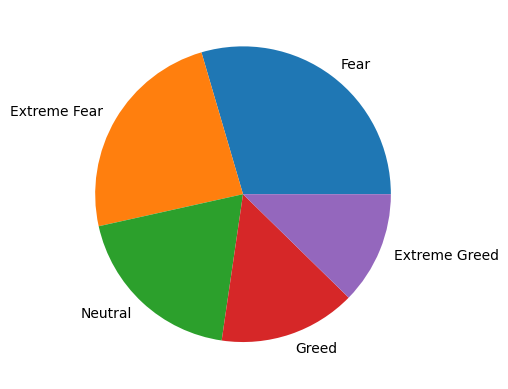

In [45]:
plt.pie(df_1_copy["classification"].value_counts(), labels = df_1_copy["classification"].unique())

/tmp/ipython-input-965491524.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


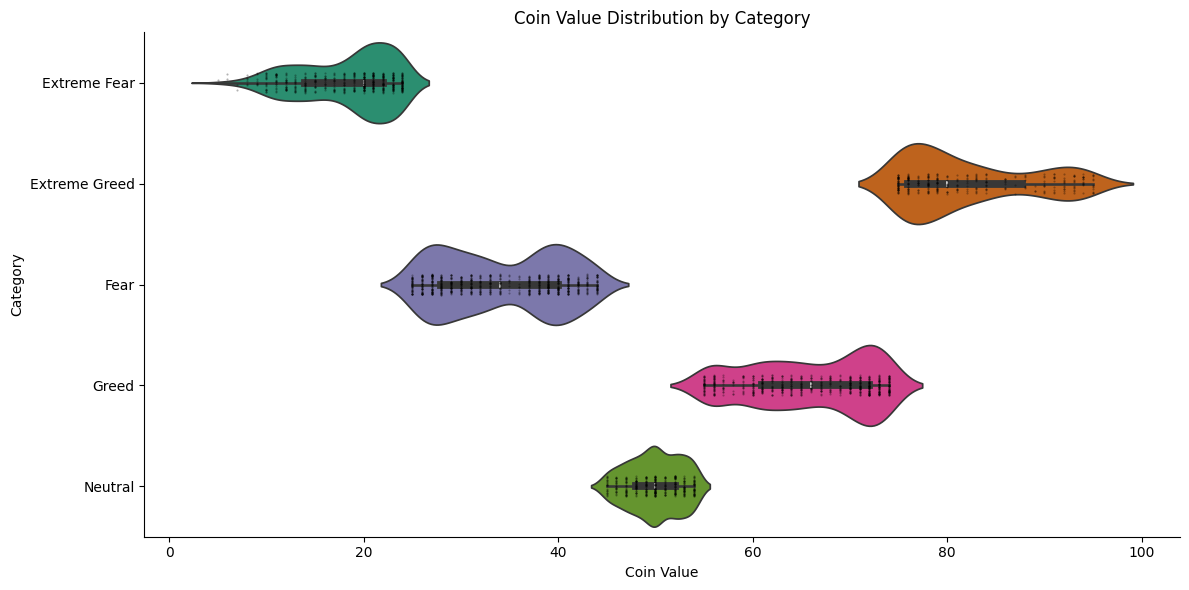

In [46]:

df_sorted = df_1_copy.sort_values(by=['classification', 'value'])

figsize = (12, 1.2 * len(df_sorted['classification'].unique()))
plt.figure(figsize=figsize)

# Create a violin plot with box overlay
sns.violinplot(
    data=df_sorted,
    x='value',
    y='classification',
    inner='box',
    palette='Dark2'
)

# Optional: Add stripplot to show individual points
sns.stripplot(
    data=df_sorted,
    x='value',
    y='classification',
    color='black',
    size=1.5,
    jitter=True,
    alpha=0.3
)

# Step 4: Clean up plot aesthetics
sns.despine(top=True, right=True)
plt.title('Coin Value Distribution by Category')
plt.xlabel('Coin Value')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


In [47]:
min,max = df_1_copy.groupby("classification")["value"].min(),df_1_copy.groupby("classification")["value"].max()
p2p =  pd.merge(min, max, how="inner", on="classification")
p2p.rename(columns={"value_x": "min","value_y":"max"}, inplace=True)
p2p

,min,max
classification,,
Extreme Fear,5,24
Extreme Greed,75,95
Fear,25,44
Greed,55,74
Neutral,45,54


In [48]:
1st,2nd=df_1_copy.value.quantile([0.25, 0.50, 0.75, 1.0])

SyntaxError: invalid decimal literal (ipython-input-3687128509.py, line 1)

In [49]:
df_2_copy = df_2

In [50]:
df_2_copy.Coin.unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [51]:
df_2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [52]:
df_2_copy.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [53]:
len(df_2_copy["Account"].unique())

32

In [54]:
len(df_2_copy["Order ID"].unique())

50555

### users which are most profitable . gambling or startegy ?

In [55]:
net_pnl = df_2_copy.groupby("Account")["Closed PnL"].sum().reset_index()
net_pnl= net_pnl.sort_values(by="Closed PnL", ascending=False)
net_pnl.head()

,Account,Closed PnL
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.143383e+06
0,0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401638e+05
13,0x513b8629fe877bb581bf244e326a047b249c4ff1,8.404226e+05
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,8.360806e+05


/tmp/ipython-input-2462014955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=net_pnl.head(10), x="Account", y="Closed PnL", palette="viridis")


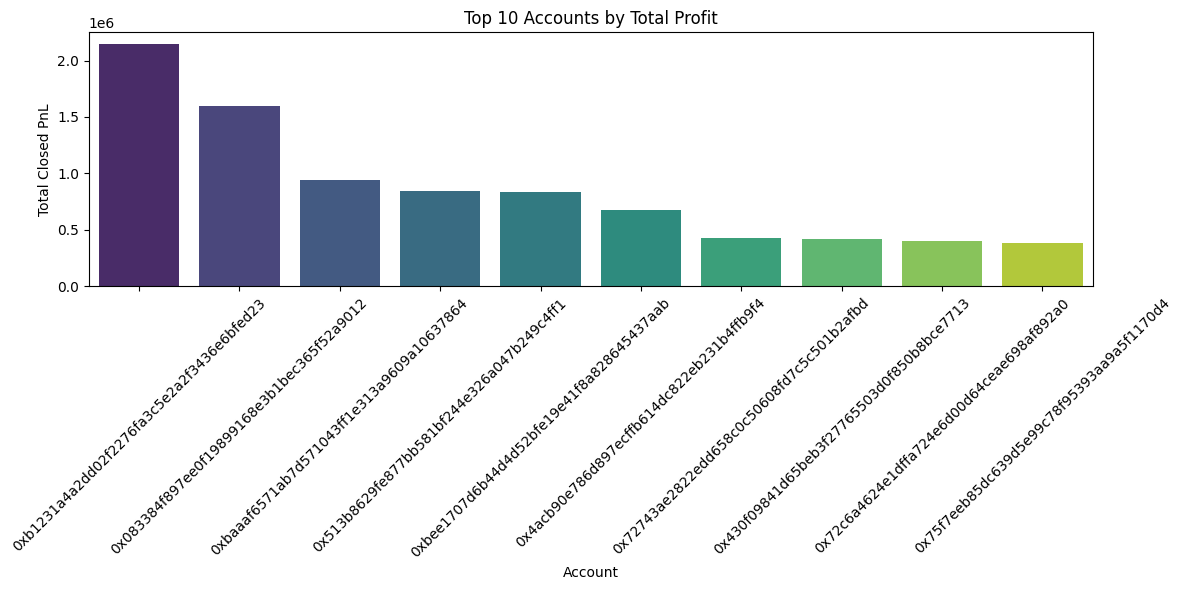

In [56]:

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=net_pnl.head(10), x="Account", y="Closed PnL", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Accounts by Total Profit")
plt.ylabel("Total Closed PnL")
plt.xlabel("Account")
plt.tight_layout()
plt.show()



### top 10 users who do most number of trades and is numbers directly proportional to net profit ?


In [57]:

  count = df_2_copy.groupby("Account").count().reset_index()[["Account","Coin"]].sort_values(by="Coin", ascending=False)
  count.rename(columns={"Coin": "total_numbers_of_trades"}, inplace=True)
  merged_df = pd.merge(count, net_pnl, how="inner", on="Account")
  merged_df.head(10)

,Account,total_numbers_of_trades,Closed PnL
0,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,8.360806e+05
1,0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192,9.401638e+05
2,0xa0feb3725a9335f49874d7cd8eaad6be45b27416,15605,1.063029e+05
3,0x8477e447846c758f5a675856001ea72298fd9cb5,14998,4.391701e+04
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733,2.143383e+06
5,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,1.324648e+05
6,0x513b8629fe877bb581bf244e326a047b249c4ff1,12236,8.404226e+05
7,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893,3.790954e+05
8,0x47add9a56df66b524d5e2c1993a43cde53b6ed85,8519,1.033437e+05
9,0x4f93fead39b70a1824f981a54d4e55b278e9f760,7584,3.089759e+05


#### we can clearly see profit isnt on numbers of trades .But a line chart wil do




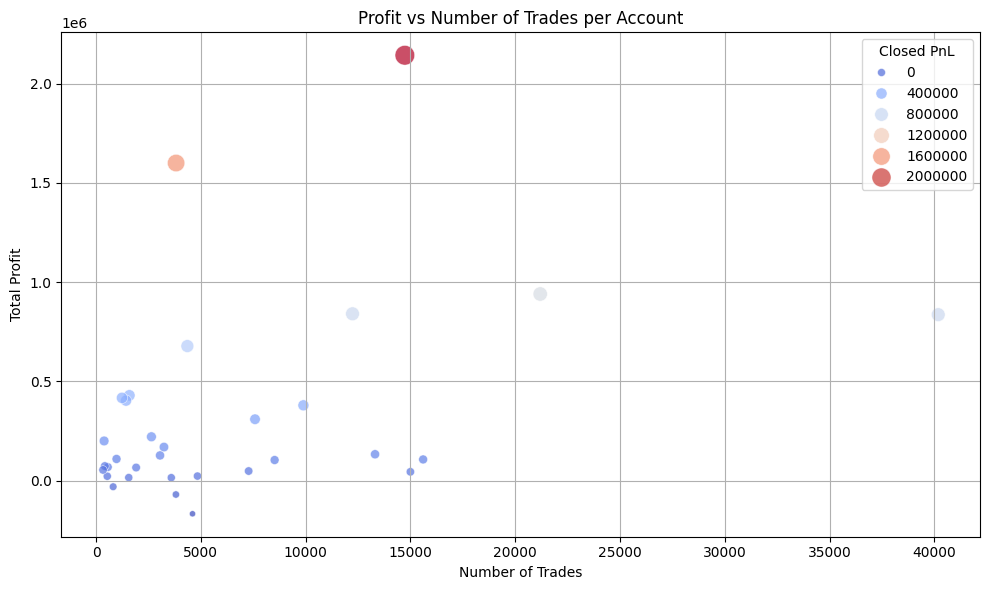

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x="total_numbers_of_trades", y="Closed PnL", hue="Closed PnL", palette="coolwarm", size="Closed PnL", sizes=(20, 200), alpha=0.7)

plt.title("Profit vs Number of Trades per Account")
plt.xlabel("Number of Trades")
plt.ylabel("Total Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
df_2_copy["Direction"].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [60]:
user_best = df_2_copy[df_2_copy["Account"] =="0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23" ]
user_best["Direction"].unique()

array(['Open Long', 'Open Short', 'Close Short', 'Close Long',
       'Long > Short', 'Short > Long', 'Sell', 'Buy',
       'Spot Dust Conversion'], dtype=object)

In [61]:
user_best["Coin"].unique()

array(['ETH', 'BTC', 'AAVE', 'JTO', 'PYTH', 'MATIC', 'SEI', 'TIA', 'ILV',
       'SOL', 'LINK', 'HPOS', 'FXS', 'RUNE', 'FIL', 'NTRN', 'CANTO',
       'BLUR', 'ARB', 'SHIA', 'PEOPLE', 'UNI', 'SUSHI', 'MEME', 'LOOM',
       'USTC', 'RLB', 'ETC', 'GAS', 'BANANA', 'UNIBOT', 'kSHIB', 'CYBER',
       'IMX', 'ARK', 'GMT', 'ENS', 'ALT', 'kPEPE', 'DYM', 'ZRO', 'CAKE',
       'INJ', 'DOGE', 'PURR/USDC', 'EIGEN', 'ETHFI', '@4', '@3', '@20',
       '@14', '@2', '@8', '@46', '@51', '@15', '@28', '@41', '@74',
       '@107', 'HYPE', '@125', 'USUAL', '@109', '@85', '@59', '@23',
       '@78', '@38'], dtype=object)

In [65]:
df_2_copy.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,emotion
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,Extreme Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,Extreme Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,Extreme Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,Extreme Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,Extreme Fear


In [63]:
p =df_2_copy.groupby("Coin")["Execution Price"].quantile([0.25,0.45,0.55,0.75])
type(p)
df_2_copy["emotion"] = "neutral"
# Example of accessing the 0.25 quantile for coin '@1'
example_value = p.loc[('@1', 0.25)]
for index , row in df_2_copy[["Coin","Execution Price"]].iterrows():
  coin = row["Coin"]
  exe_price = row["Execution Price"]
  if exe_price < p.loc[(coin, 0.25)]:
    df_2_copy.loc[index,"emotion"] = "Extreme Fear"
  elif exe_price < p.loc[(coin, 0.45)] and exe_price >= p.loc[(coin, 0.25)] :
    df_2_copy.loc[index,"emotion"] = "Fear"
  elif exe_price < p.loc[(coin, 0.75)] and exe_price >= p.loc[(coin, 0.45)]:
    df_2_copy.loc[index,"emotion"] = "Greedy"
  elif exe_price > p.loc[(coin, 0.75)]:
    df_2_copy.loc[index,"emotion"] = "Extreme Greedy"




In [66]:
df_2_copy.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,emotion
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,Extreme Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,Extreme Fear
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,Extreme Fear
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,Extreme Fear
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,Extreme Fear


In [68]:
user_best.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
39055,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,05-12-2023 03:11,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,1.700000e+12
39056,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.8681,1935.95,BUY,05-12-2023 03:11,0.4933,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.483987,2.340000e+14,1.700000e+12
39057,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.2500,557.52,BUY,05-12-2023 03:11,1.3614,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.139381,2.580000e+14,1.700000e+12
39058,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,3.3733,7522.80,BUY,05-12-2023 03:11,1.6114,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,1.880699,8.740000e+14,1.700000e+12
39059,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,1.8856,4205.08,BUY,05-12-2023 03:11,4.9847,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,1.051269,1.020000e+15,1.700000e+12


In [ ]:
coin_percentiles = df_2_copy.groupby("Coin")["Execution Price"].apply(lambda x: np.percentile(df_2_copy[df_2_copy["Coin"]==x["Coin"]]["Execution Price"] , x))
display(coin_percentiles)

/tmp/ipython-input-1578859461.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


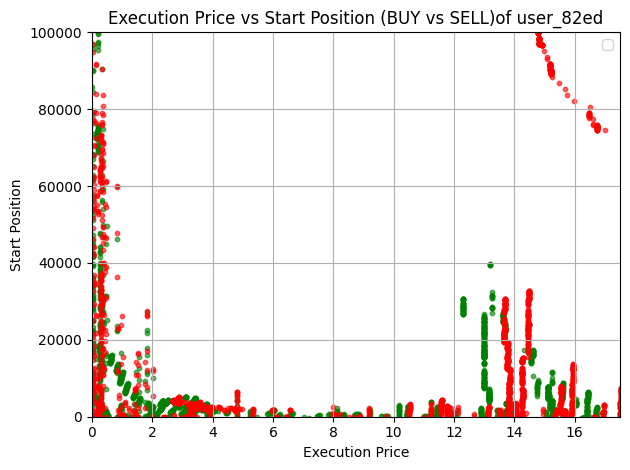

In [70]:
buy = user_best[user_best["Side"] == "BUY"]
sell = user_best[user_best["Side"] == "SELL"]

plt.scatter(buy["Execution Price"] , buy["Start Position"], color ="green" , alpha = 0.6 , s = 10)
plt.scatter(sell["Execution Price"] , sell["Start Position"], color ="red" , alpha = 0.6 , s = 10)

plt.xlim(0, 17.5)
plt.ylim(0, 100000)
plt.xlabel("Execution Price")
plt.ylabel("Start Position")
plt.title("Execution Price vs Start Position (BUY vs SELL)of user_82ed")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
df_2_copy["Side"].unique()

array(['BUY', 'SELL'], dtype=object)

# Task
Generate a plot for every coin traded by `user_best`, with 'Timestamp IST' on the x-axis and 'Execution Price' on the y-axis. Add vertical lines to indicate the trading decisions ('Direction') made by `user_best` for each coin.

In [73]:
unique_coins = user_best["Coin"].unique()

In [74]:
filtered_coins_data = {}
for coin in unique_coins:
    filtered_coins_data[coin] = user_best[user_best['Coin'] == coin]

## Plot execution price


For each coin, plot the 'Execution Price' against the datetime.


In [77]:


for coin, df in filtered_coins_data.items():
    fig, ax = plt.figure(figsize=(12, 6)), plt.axes()
    ax.plot(df['Timestamp IST'], df['Execution Price'])
    ax.set_title(f'Execution Price for {coin}')
    ax.set_xlabel('Timestamp IST')
    ax.set_ylabel('Execution Price')
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Add vertical lines for decisions


Add vertical lines to the plots to indicate the trading decisions ('Direction') made by `user_best` for each coin.


In [78]:
direction_colors = {
    'Buy': 'green',
    'Sell': 'red',
    'Open Long': 'darkgreen',
    'Close Long': 'lightgreen',
    'Open Short': 'darkred',
    'Close Short': 'salmon',
    'Long > Short': 'purple',
    'Short > Long': 'orange',
    'Spot Dust Conversion': 'gray',
    'Auto-Deleveraging': 'brown',
    'Liquidated Isolated Short': 'black',
    'Settlement': 'cyan'
}

for coin, df in filtered_coins_data.items():
    fig, ax = plt.figure(figsize=(12, 6)), plt.axes()
    ax.plot(df['Timestamp IST'], df['Execution Price'], label='Execution Price')
    ax.set_title(f'Execution Price and Trades for {coin}')
    ax.set_xlabel('Timestamp IST')
    ax.set_ylabel('Execution Price')

    for index, row in df.iterrows():
        timestamp = row['Timestamp IST']
        direction = row['Direction']
        color = direction_colors.get(direction, 'blue') # Default to blue if direction not in dict
        ax.axvline(timestamp, color=color, linestyle='--', alpha=0.7, label=direction if direction not in ax.get_legend_handles_labels()[1] else "")

    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.